In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
import seaborn as sns
#自动显示图像，不必plt.show()
%matplotlib inline  
#自动重新载入
%load_ext autoreload
%autoreload 2

In [3]:
train = pd.read_csv('./dataset/train.csv')
test = pd.read_csv('./dataset/test.csv')

In [5]:
#显示特征
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [9]:
print('一共 {} 个训练集样本'.format(train.shape[0]))
print('一共 {} 个测试集样本'.format(test.shape[0]))

一共 1460 个训练集样本
一共 1459 个测试集样本


In [10]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 特征分析：统计学和绘图
> 有80个特征属性,可以先绘图直观看出一些特征属性的分布情况

In [11]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/home/yangchonghuan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


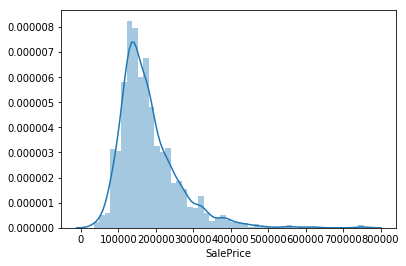

In [16]:
sns.distplot(train['SalePrice'])

> **skewness**: 随机变量与中心分布的不对称程度，向右倾斜，值为正，向左值为负**反应倾斜**

> **kurtosis**: 随机变量在均值附近的相对平坦程度或峰值程度，以正态分布为界，峰度值为0，如比正态分布陡，峰度值大于0，否则小于0.**反应尾部胖瘦**

>mean: 第一矩。表位置

>variance: 第二矩。表胖瘦

>skewness: 第三矩。表歪斜

>kurtosis: 第四矩。表尾巴胖瘦

In [17]:
print('skewness: %f'%train['SalePrice'].skew())
print('kurtosis: %f'%train['SalePrice'].kurt())

skewness: 1.882876
kurtosis: 6.536282


## 特征工程

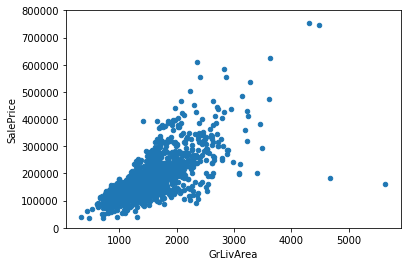

In [18]:
var = 'GrLivArea'
data = pd.concat([train['SalePrice'],train[var]],axis = 1)
data.plot.scatter(x = var, y = 'SalePrice',ylim=(0,800000))

**<font color=red>SalePrice 与 GrLivArea 基本线性相关</font>**

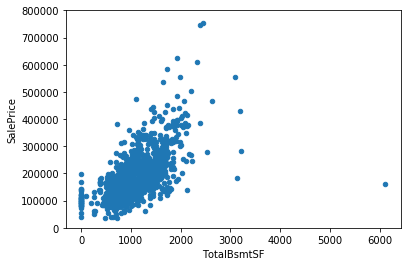

In [20]:
var = 'TotalBsmtSF'
data = pd.concat([train['SalePrice'],train[var]],axis = 1)
data.plot.scatter(x = var, y = 'SalePrice',ylim=(0,800000))

**<font color=red> TotalBsmtSF 与 SalePrice关系也很密切，基本指数分布，
但在左侧特定情况TotalBsmtSF 对 SalePrice无影响</font>**

(-0.5, 9.5, 0, 800000)

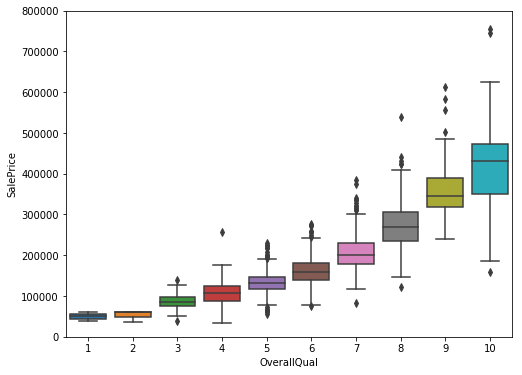

In [24]:
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

# 箱图与异常值检查

**<font color=red> OverallQual 与 SalePrice分布趋势相同</font>**

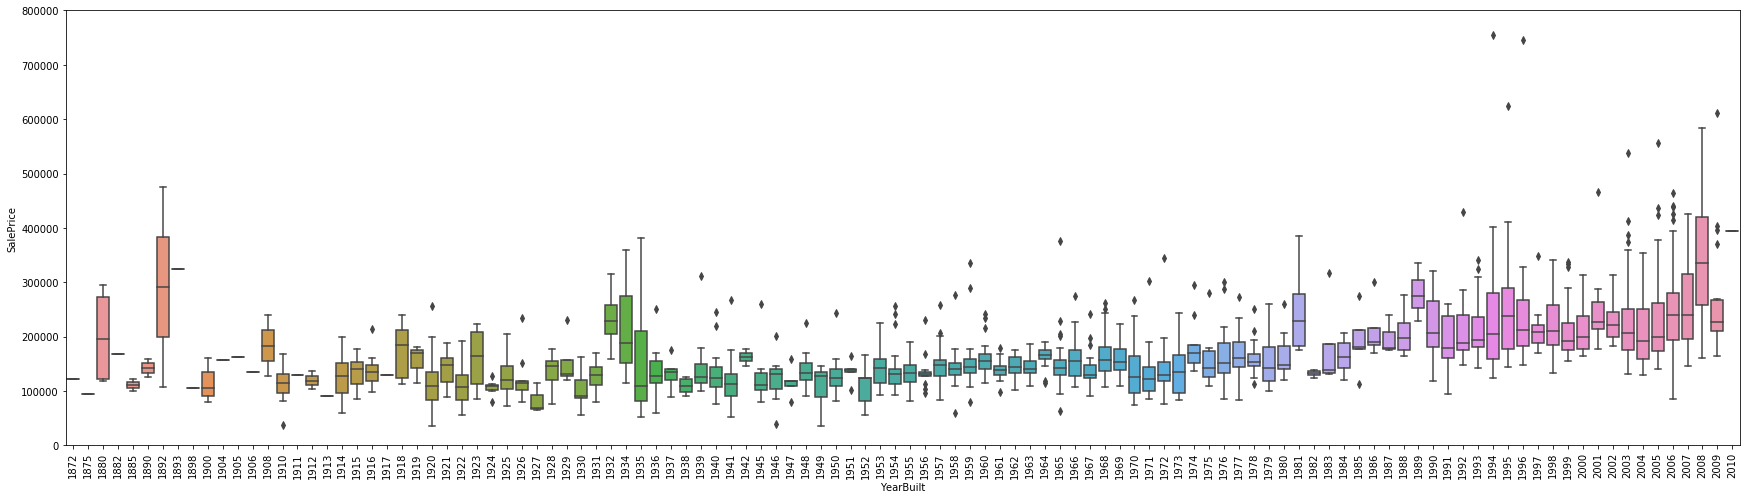

In [25]:
#YearBuilt 与 SalePrice 箱型图
var = 'YearBuilt'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(30, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);plt.xticks(rotation=90);

**<font color=red> YearBuilt 与 SalePrice没有很强的趋势性，但可以看出建造时间短的价格更高</font>**

** 总结：**
    
>GrLivArea 和 TotalBsmtSF 与 SalePrice 似乎线性相关，并且都是正相关。 对于 TotalBsmtSF 线性关系的斜率十分的高。   

>OverallQual 和 YearBuilt 与 SalePrice 也有关系。OverallQual 的相关性更强, 箱型图显示了随着整体质量的增长，房价的增长趋势。

>我们只分析了四个变量，但是还有许多其他变量我们也应该分析，这里的技巧在于选择正确的特征（特征选择）而不是定义他们之间的复杂关系（特征工程）。

###  综合所有特征分析
### 1. 所有特征相关度分析（相关系数矩阵）

In [27]:
train_corr = train.drop('Id',axis = 1).corr()
train_corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


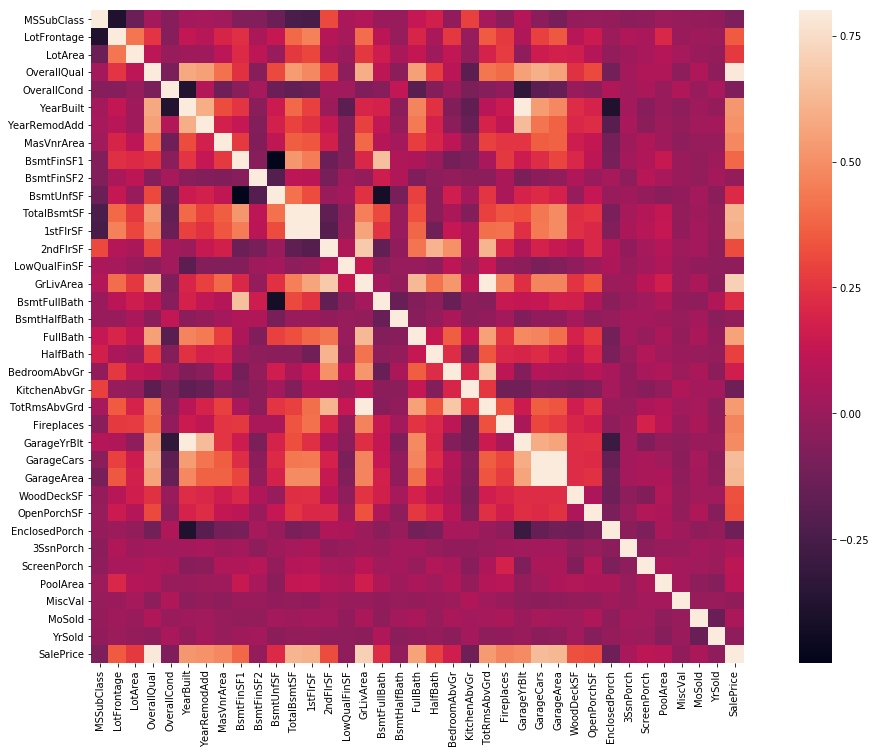

In [31]:
# 画相关性热力图来分析
a = plt.subplots(figsize = (20,12))#调整画布大小
a = sns.heatmap(train_corr,vmax=.8,square=True)#annot = True 显示系数

In [32]:
#首先两个白色的方块吸引到了我，
#第一个是 TotalBsmtSF 和 1stFlrSF 变量的相关系数，第二个是 GarageX 变量群。
#这两个示例都显示了这些变量之间很强的相关性。实际上，相关性的程度达到了一种多重共线性的情况。
#我们可以总结出这些变量几乎包含相同的信息，所以确实出现了多重共线性。
#另一个引起注意的地方是 SalePrice 的相关性。
#我们可以看到我们之前分析的 GrLivArea，TotalBsmtSF和 OverallQual 的相关性很强，除此之外也有很多其他的变量应该进行考虑，这也是我们下一步的内容。
#这里在笔者参考网上的资料时发现其分析，我感觉太扯了，有视觉障碍的人根本看不出来，所以我们从数值来看其特征关系

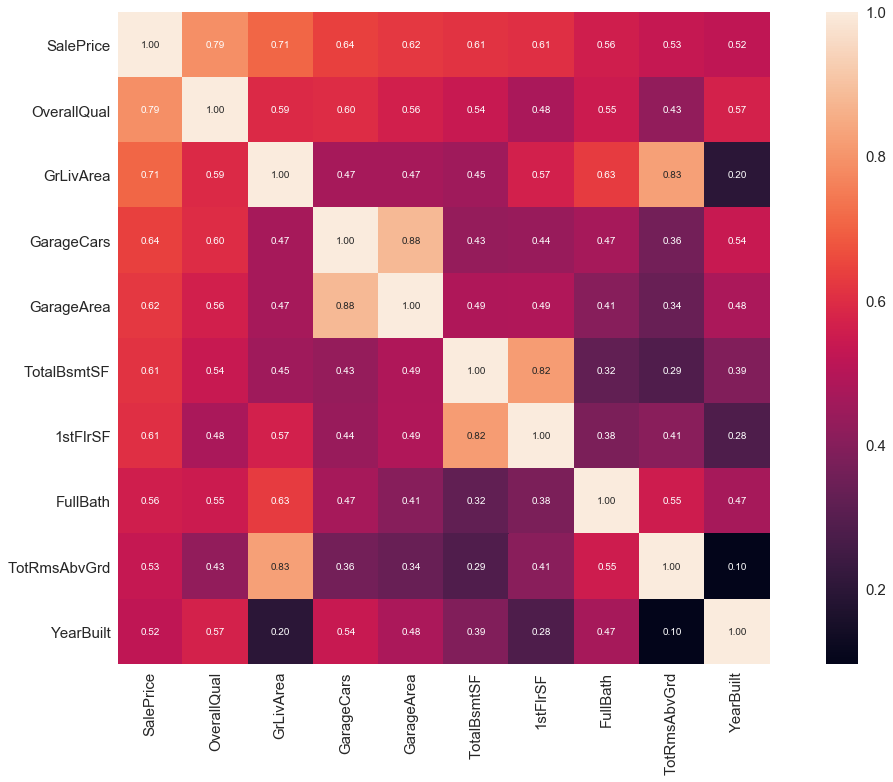

In [33]:
# 寻找K个最相关的特征信息
k = 10 # number of variables for heatmap
cols = train_corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.5)
hm = plt.subplots(figsize=(20, 12))#调整画布大小
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [34]:
# 通过第一列分析

#OverallQual，GrLivArea 以及 TotalBsmtSF  与 SalePrice 有很强的相关性。
#GarageCars 和 GarageArea 也是相关性比较强的变量。
#车库中存储的车的数量是由车库的面积决定的，它们就像双胞胎，所以不需要专门区分 GarageCars 和 GarageAre，所以我们只需要其中的一个变量。
#这里我们选择了 GarageCars，因为它与 SalePrice 的相关性更高一些。

#TotalBsmtSF  和 1stFloor 与上述情况相同，我们选择 TotalBsmtS 。

#TotRmsAbvGrd 和 GrLivArea 也是变量中的双胞胎。（我们通过变量中其相关系数越接近于一，其变量就越相关）


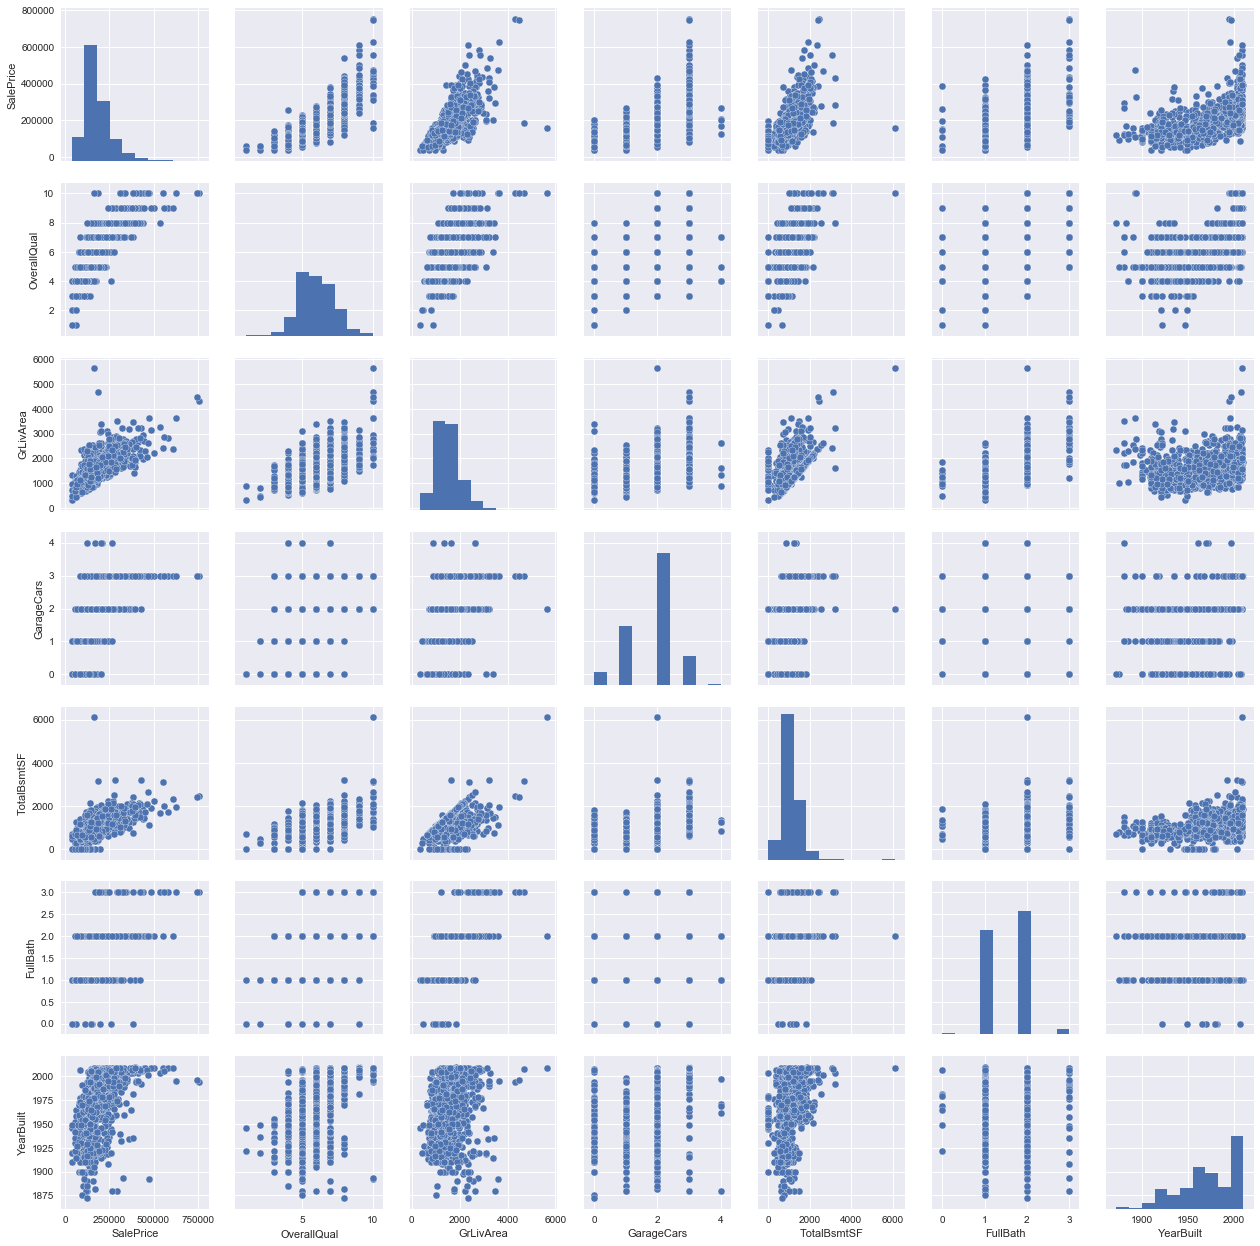

In [35]:
#SalePrice 和相关变量之间的散点图对应上面的相关性矩阵，也是观察第一列

sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea','GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();

In [36]:
train[['SalePrice', 'OverallQual', 'GrLivArea','GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']].info()
#对特征进行简单了解

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
SalePrice      1460 non-null int64
OverallQual    1460 non-null int64
GrLivArea      1460 non-null int64
GarageCars     1460 non-null int64
TotalBsmtSF    1460 non-null int64
FullBath       1460 non-null int64
YearBuilt      1460 non-null int64
dtypes: int64(7)
memory usage: 79.9 KB


In [37]:
#在第一步数据的分析中尽管我们已经知道了一些主要特征，这一丰富的散点图给了我们一个关于变量关系的合理假想。
#但是其中，TotalBsmtSF 和 GrLiveArea 之间的散点图是很有意思的。
#我们可以看出这幅图中，一些点组成了线，就像边界一样。大部分点都分布在那条线下面，这也是可以解释的。
#地下室面积和地上居住面积可以相等，但是一般情况下不会希望有一个比地上居住面积还大的地下室。

#还有SalePrice 和 YearBuilt 之间的散点图也值得我们思考。
#在 “点云” 的底部，我们可以观察到一个几乎呈指数函数的分布。
#我们也可以看到 “点云” 的上端也基本呈同样的分布趋势。
#并且可以注意到，近几年的点有超过这个上端的趋势。
#所以我们会发现在一些边缘数据中能看出特征具有的特性，但是这个能不能作为我们对数据特征的认识呢？
#这个就有待接下来特征工程中去继续分析了